In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/RtmSimulation_kickstart.csv', index_col= 0)

In [3]:
df.head()

lai  wetness          treeSpecies  Sentinel_2A_492.4  Sentinel_2A_559.8  \
id                                                                             
1   5.10     0.36   predominantly_pine           0.062092           0.131702   
2   5.34     0.47  predominantly_beech           0.052807           0.129987   
3   4.53     0.68   predominantly_pine           0.047937           0.139421   
4   2.10     0.80  predominantly_beech           0.045907           0.107761   
5   5.34     0.48                mixed           0.051712           0.136293   

    Sentinel_2A_664.6  Sentinel_2A_704.1  Sentinel_2A_740.5  \
id                                                            
1            0.043197           0.177134           0.401750   
2            0.043061           0.153641           0.407523   
3            0.045780           0.157121           0.395428   
4            0.033984           0.128237           0.341315   
5            0.041502           0.167564           0.407460   

    Sentinel_2A_782.8  Sentinel_2A_832.8  ...     w2491     w2492     w2493  \
id                                        ...                                 
1            0.458003           0.463287  ...  0.037392  0.026100  0.033480   
2            0.466853           0.477236  ...  0.028002  0.030901  0.039650   
3            0.441620           0.448626  ...  0.015169  0.020155  0.025696   
4            0.385277           0.382241  ...  0.029487  0.031408  0.032888   
5            0.454137           0.464966  ...  0.024510  0.023754  0.026276   

       w2494     w2495     w2496     w2497     w2498     w2499     w2500  
id                                                                        
1   0.027219  0.033905  0.017797  0.038259  0.020111  0.027921  0.027520  
2   0.029524  0.032461  0.030735  0.023527  0.029523  0.021542  0.026780  
3   0.026504  0.028994  0.031195  0.025666  0.032225  0.016128  0.026495  
4   0.029878  0.027617  0.034964  0.031996  0.032882  0.019543  0.121085  
5   0.031367  0.039625  0.036997  0.022577  0.039619  0.031636  0.022230  

[5 rows x 2114 columns]

## Description and stats

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Columns: 2114 entries, lai to w2500
dtypes: float64(2113), object(1)
memory usage: 16.1+ MB


In [5]:
df.columns

Index(['lai', 'wetness', 'treeSpecies', 'Sentinel_2A_492.4',
       'Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       ...
       'w2491', 'w2492', 'w2493', 'w2494', 'w2495', 'w2496', 'w2497', 'w2498',
       'w2499', 'w2500'],
      dtype='object', length=2114)

In [6]:
df.columns[4:14]

Index(['Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       'Sentinel_2A_864.7', 'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4',
       'w400'],
      dtype='object')

## Value Distributions

<Axes: ylabel='Frequency'>

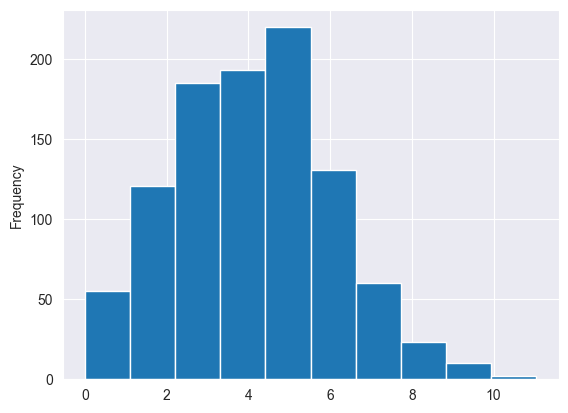

In [7]:
df['lai'].plot.hist()

In [3]:
df['ForestType'] = ''
df.loc[df['lai'] <= 1,'ForestType' ] = 'woodLands'
df.loc[(df['lai'] > 1) & (df['lai'] <= 2),'ForestType'] = 'openForest'
df.loc[(df['lai'] > 2) & (df['lai'] <= 4),'ForestType']  = 'moderateDenseForest'
df.loc[(df['lai'] > 4) & (df['lai'] <= 6),'ForestType']  = 'denseForest'
df.loc[df['lai'] >= 6,'ForestType' ] = 'veryDenseForest'

<Axes: ylabel='Frequency'>

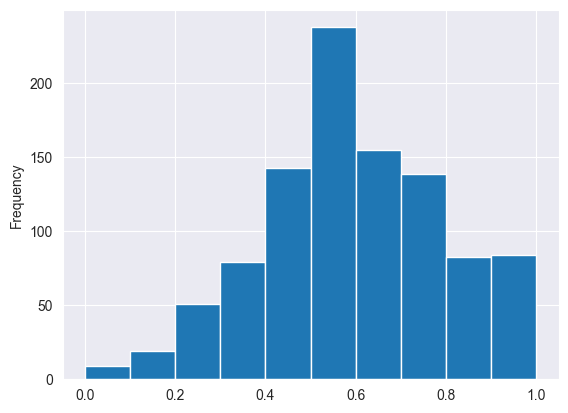

In [9]:
df['wetness'].plot.hist()

In [10]:
df['treeSpecies'].value_counts()

treeSpecies
mixed                  392
predominantly_pine     258
predominantly_beech    229
pine                    63
beech                   58
Name: count, dtype: int64

### Null values

In [32]:
df.isnull().sum().sort_values(ascending = False)

Sentinel_2A_704.1    10
Sentinel_2A_740.5    10
Sentinel_2A_782.8    10
w469                 10
w473                  8
                     ..
w1092                 0
w1091                 0
w1090                 0
w1089                 0
w2500                 0
Length: 2114, dtype: int64

In [38]:
df.isnull().any(axis=1).sum()

65

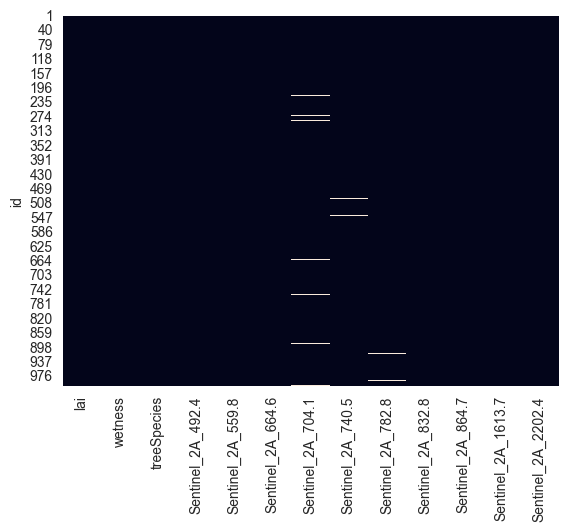

In [25]:
sns.heatmap(df.iloc[:,:13].isnull(), cbar = False)
plt.show()

In [47]:
null_df = df[df.isnull().any(axis=1)]

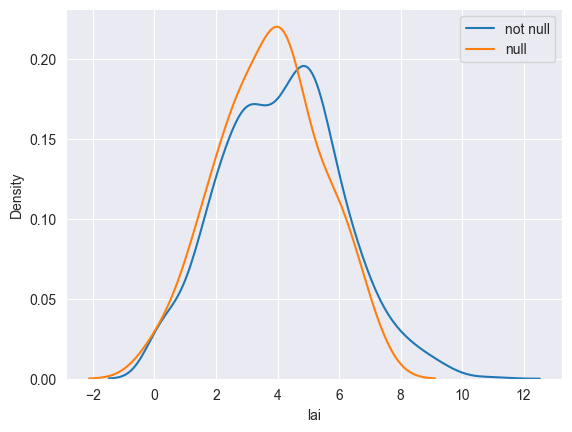

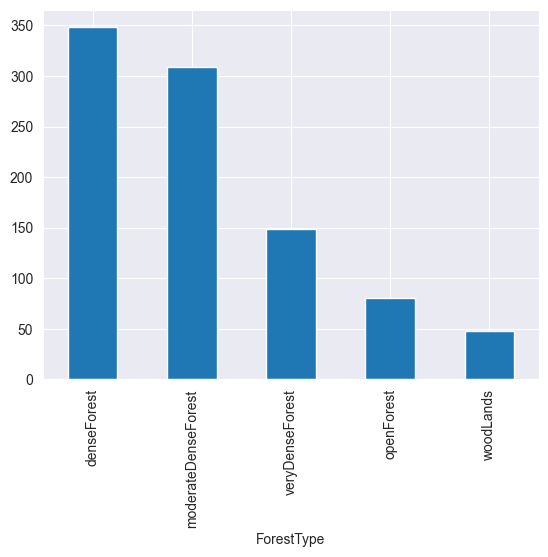

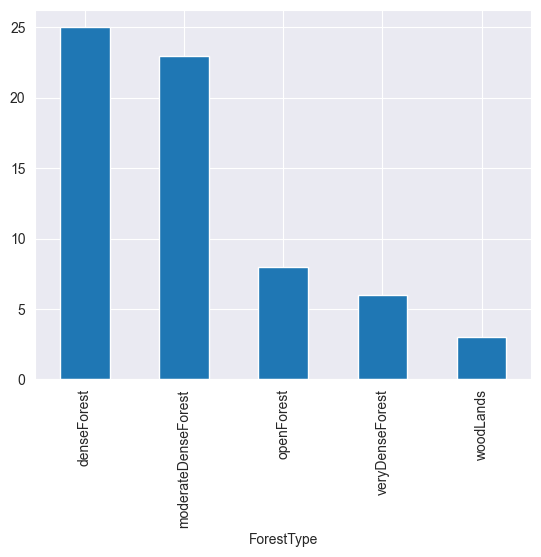

In [48]:
# density plot lai of null_df vs not null df
sns.kdeplot(df.dropna()['lai'], label = 'not null')
sns.kdeplot(null_df['lai'], label = 'null')
plt.legend()
plt.show()

df.dropna()['ForestType'].value_counts().plot.bar()
plt.show()
null_df['ForestType'].value_counts().plot.bar()
plt.show()

### Tree species

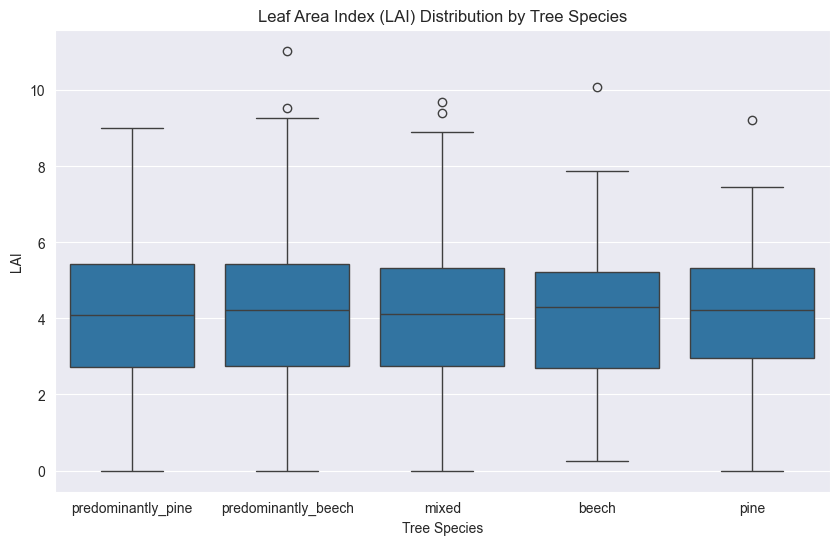

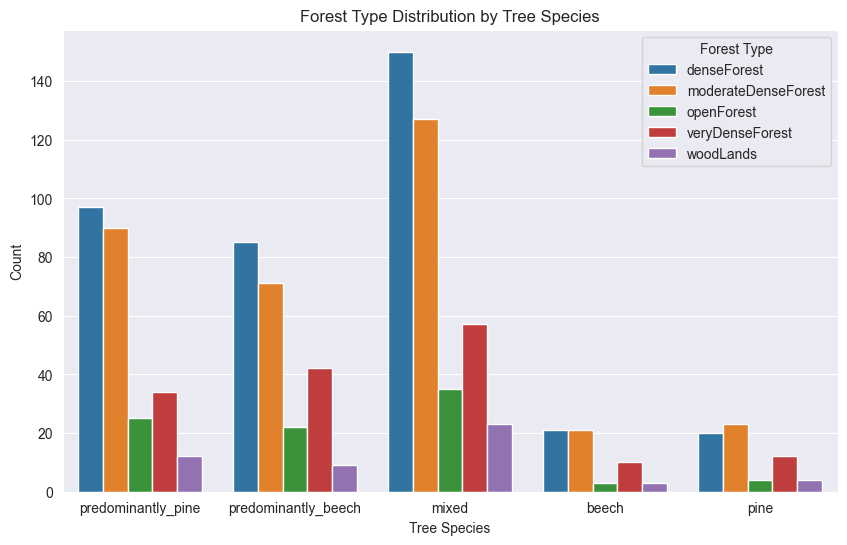

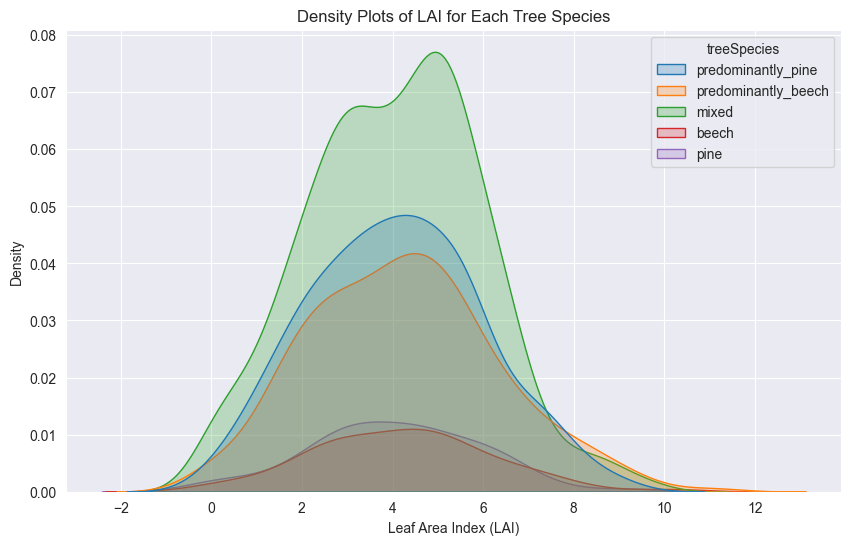

In [32]:
# Visualization 1: Boxplot for 'lai' across different 'treeSpecies'
plt.figure(figsize=(10, 6))
sns.boxplot(x='treeSpecies', y='lai', data=df)
plt.title('Leaf Area Index (LAI) Distribution by Tree Species')
plt.xlabel('Tree Species')
plt.ylabel('LAI')
plt.show()

# Visualization 2: Count plot for 'ForestType' across different 'treeSpecies'
plt.figure(figsize=(10, 6))
sns.countplot(x='treeSpecies', hue='ForestType', data=df)
plt.title('Forest Type Distribution by Tree Species')
plt.xlabel('Tree Species')
plt.ylabel('Count')
plt.legend(title='Forest Type')
plt.show()

# Creating density plots for LAI per tree species
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='lai', hue='treeSpecies', fill=True)
plt.title('Density Plots of LAI for Each Tree Species')
plt.xlabel('Leaf Area Index (LAI)')
plt.ylabel('Density')
plt.show()

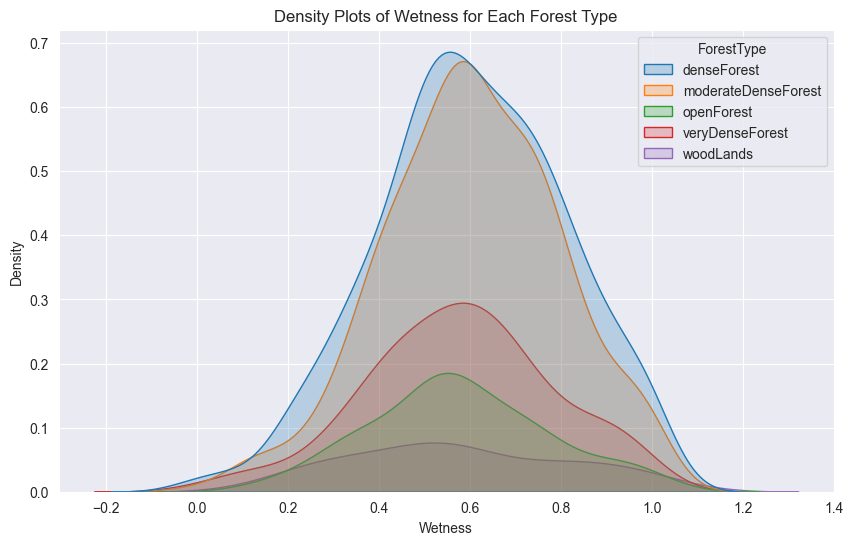

In [47]:
# Creating density plots for LAI per tree species
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='wetness', hue='ForestType', fill=True)
plt.title('Density Plots of Wetness for Each Forest Type')
plt.xlabel('Wetness')
plt.ylabel('Density')
plt.show()

#### Sentinel direct measurements

<Axes: ylabel='id'>

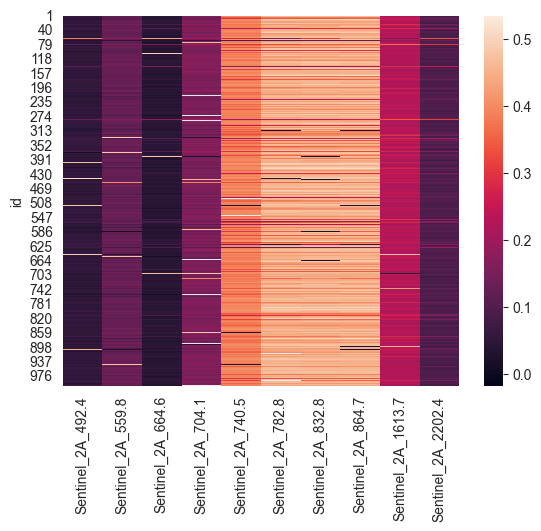

In [11]:
sns.heatmap(df.iloc[:,3:13])

### Complete reflection

<Axes: ylabel='id'>

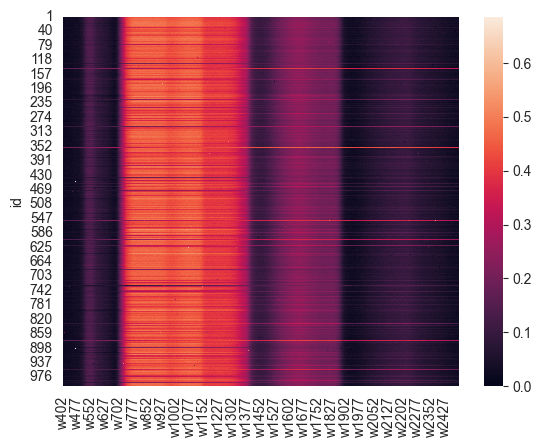

In [12]:
sns.heatmap(df.iloc[:,15:-1])

## Correlations

### With Sentinel measurements

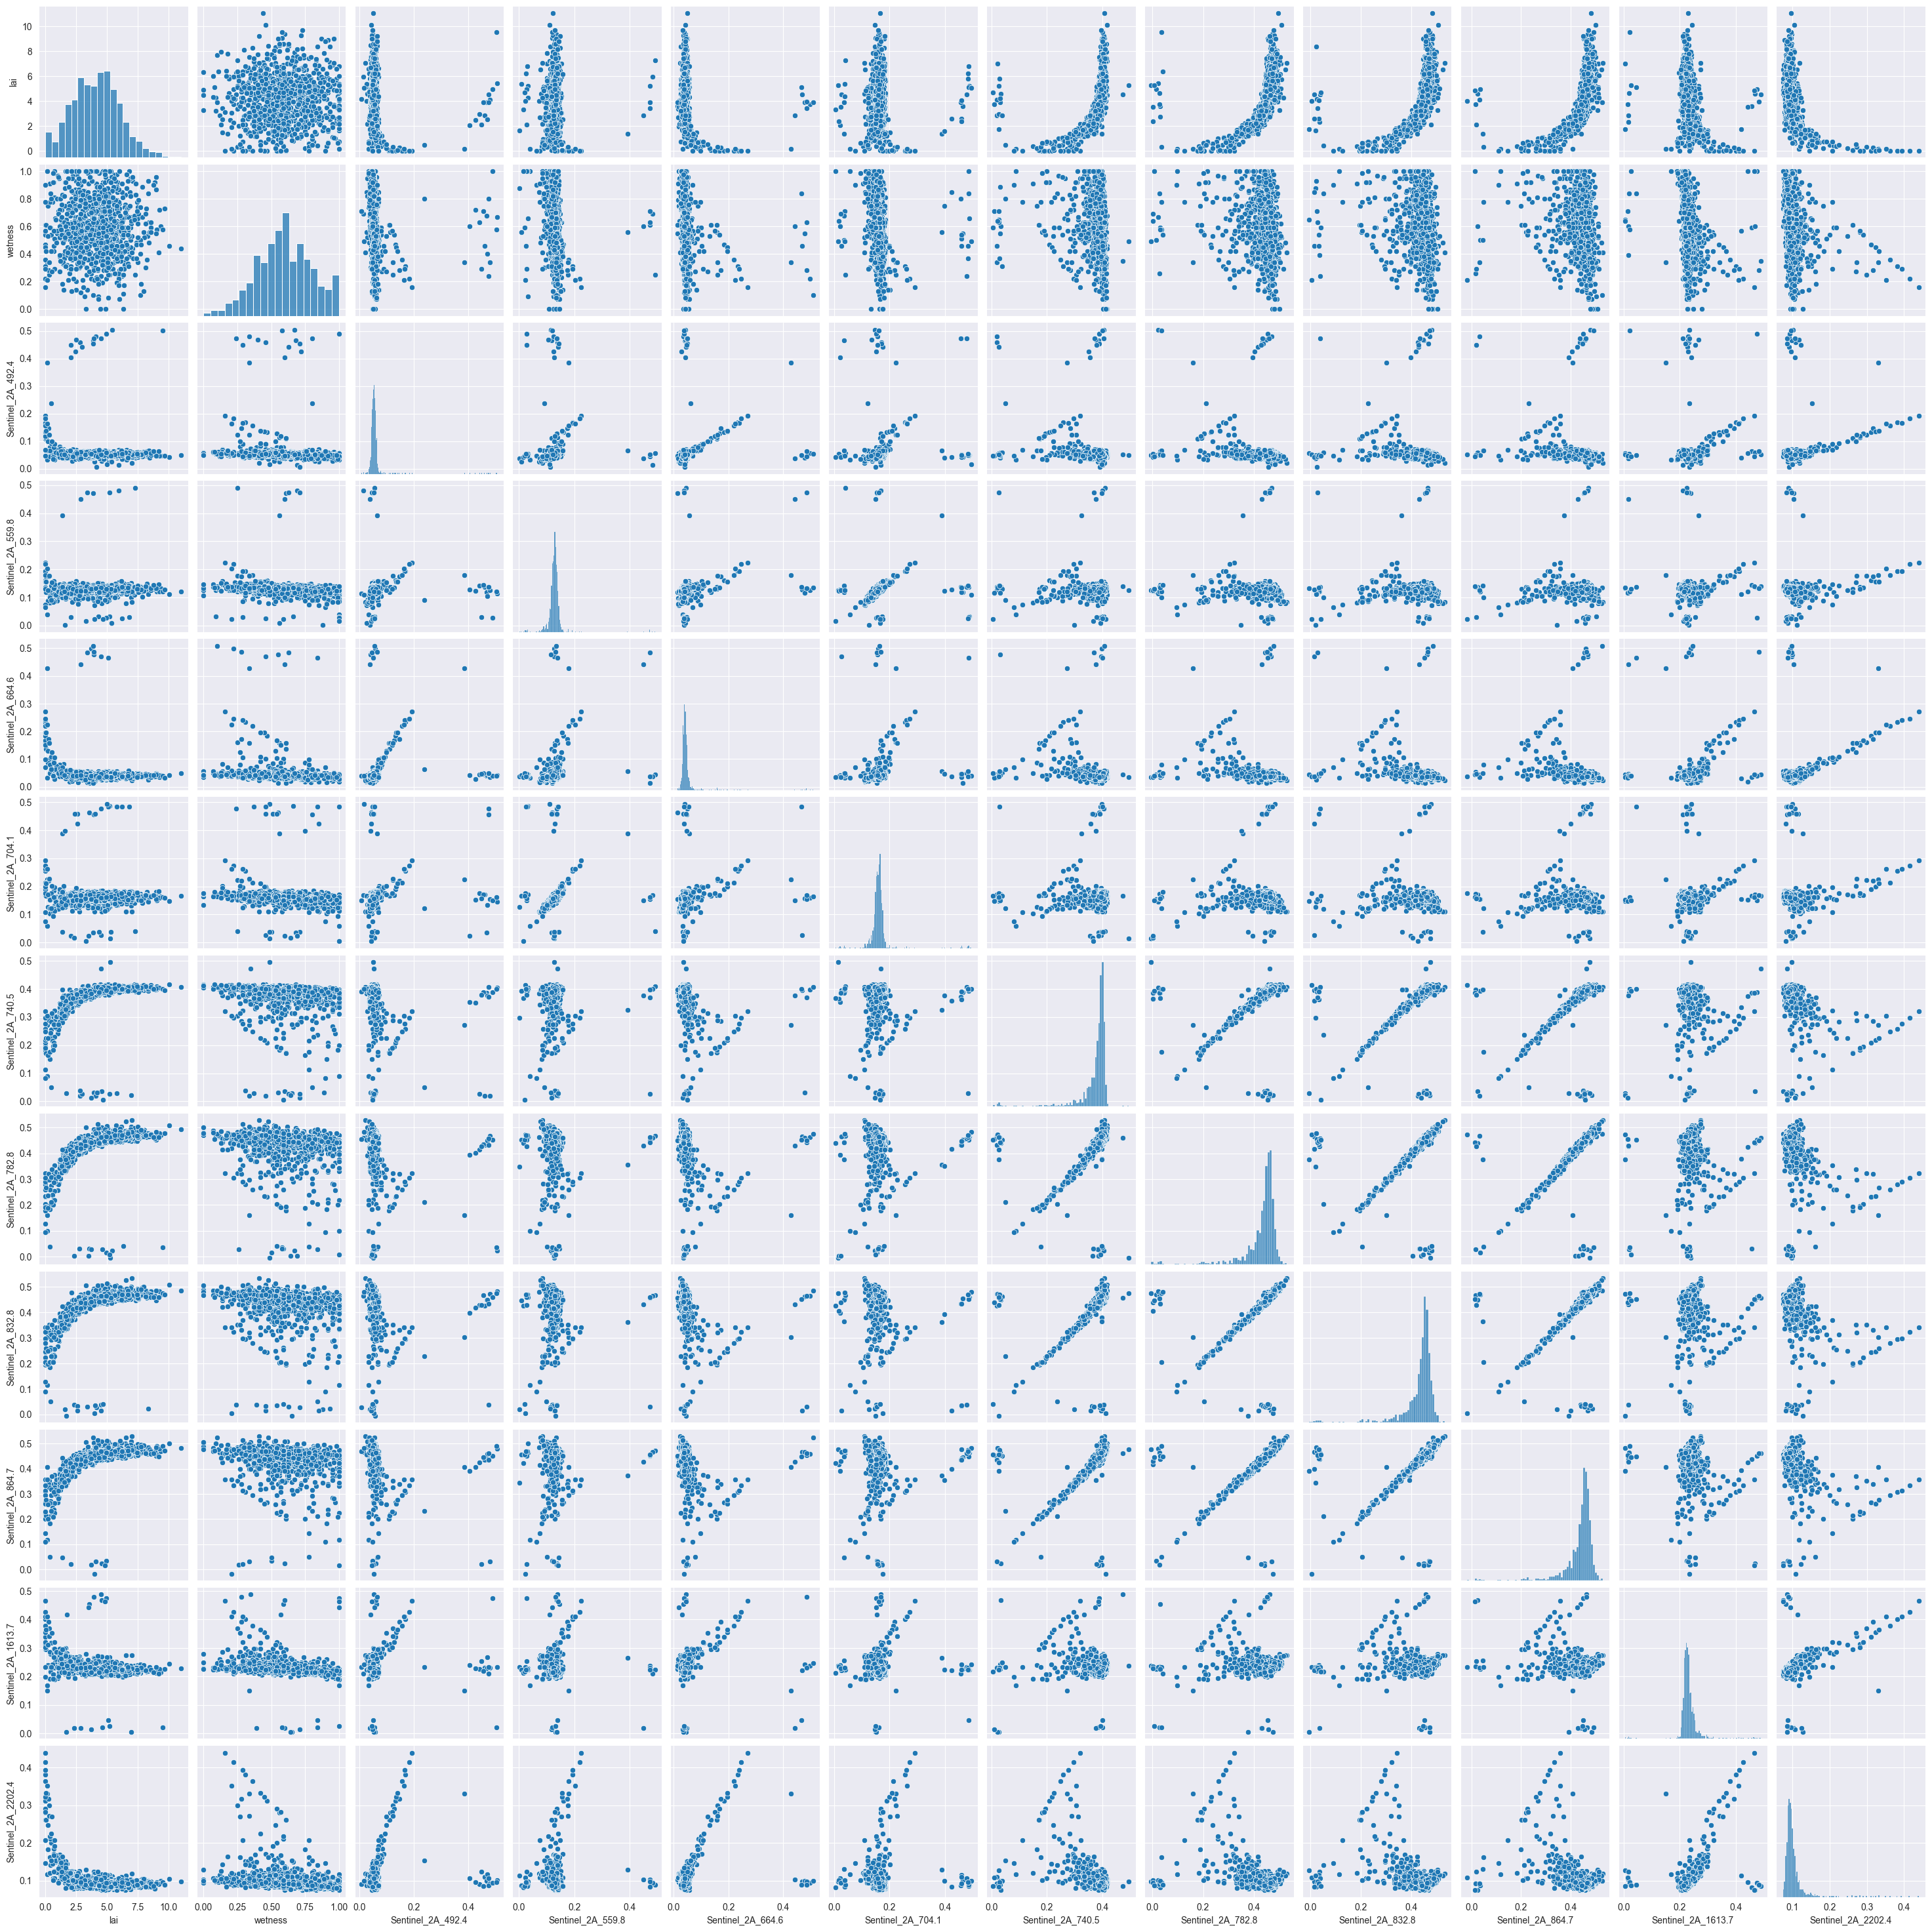

In [13]:
sns.pairplot(df.iloc[:,0:13].drop('treeSpecies', axis = 1))

<Axes: >

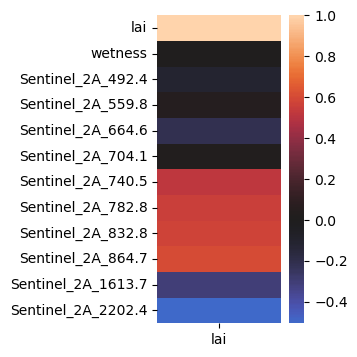

In [14]:
plt.figure(figsize = (2,4))
sns.heatmap(df.iloc[:,0:13].drop('treeSpecies', axis = 1).corr()['lai'].to_frame(), center = 0)

### With reflection values

<Axes: >

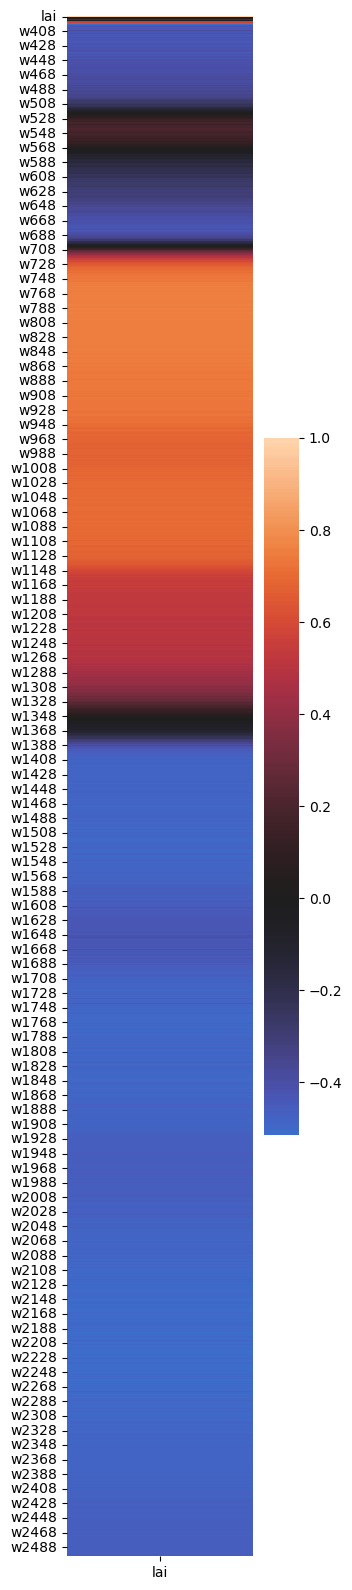

In [15]:
plt.figure(figsize = (3,20))
sns.heatmap(df.drop(['treeSpecies', 'ForestType'], axis = 1).corr()['lai'].to_frame(), cmap = 'icefire', center = 0)

### Reflection curves

<Axes: >

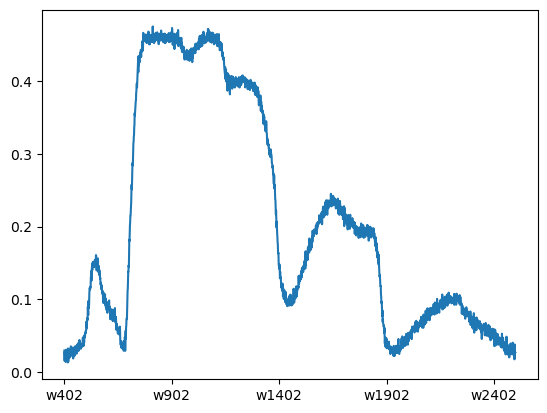

In [16]:
df.iloc[0,15:-1].plot()

<Axes: >

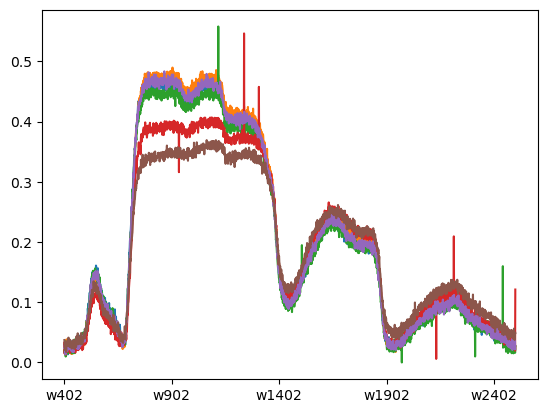

In [17]:
df.iloc[0,15:-1].plot()
df.iloc[1,15:-1].plot()
df.iloc[2,15:-1].plot()
df.iloc[3,15:-1].plot()
df.iloc[4,15:-1].plot()
df.iloc[5,15:-1].plot()

#### All curves

In [4]:
df = df.reset_index().rename(columns = {'index':'id'})

In [5]:
df_long = pd.wide_to_long(df.dropna(), stubnames='w', i = 'id' , j = 'wavelength').reset_index()
df_long.set_index('id', inplace = True)
df_long.rename(columns={'w':'reflection'}, inplace= True)
df_long

wavelength  Sentinel_2A_832.8  Sentinel_2A_1613.7  Sentinel_2A_664.6  \
id                                                                           
1            400           0.463287            0.224946           0.043197   
2            400           0.477236            0.228034           0.043061   
3            400           0.448626            0.215900           0.045780   
4            400           0.382241            0.241785           0.033984   
5            400           0.464966            0.220666           0.041502   
...          ...                ...                 ...                ...   
995         2500           0.385352            0.271863           0.037658   
996         2500           0.469821            0.223149           0.036994   
997         2500           0.458192            0.205654           0.034888   
998         2500           0.463945            0.219279           0.036825   
1000        2500           0.339312            0.215011           0.040971   

      wetness  Sentinel_2A_782.8  Sentinel_2A_864.7  Sentinel_2A_2202.4   lai  \
id                                                                              
1        0.36           0.458003           0.465697            0.094398  5.10   
2        0.47           0.466853           0.469157            0.096956  5.34   
3        0.68           0.441620           0.448503            0.090629  4.53   
4        0.80           0.385277           0.380013            0.105857  2.10   
5        0.48           0.454137           0.459594            0.085389  5.34   
...       ...                ...                ...                 ...   ...   
995      0.60           0.375413           0.392163            0.133181  1.66   
996      0.46           0.471003           0.468834            0.096436  6.23   
997      0.92           0.445944           0.457702            0.084067  5.32   
998      0.53           0.464352           0.465088            0.093209  4.94   
1000     0.82           0.333324           0.346561            0.106486  1.55   

      Sentinel_2A_740.5  Sentinel_2A_559.8           ForestType  \
id                                                                
1              0.401750           0.131702          denseForest   
2              0.407523           0.129987          denseForest   
3              0.395428           0.139421          denseForest   
4              0.341315           0.107761  moderateDenseForest   
5              0.407460           0.136293          denseForest   
...                 ...                ...                  ...   
995            0.328274           0.101292           openForest   
996            0.400706           0.025300      veryDenseForest   
997            0.388046           0.129982          denseForest   
998            0.394375           0.130657          denseForest   
1000           0.304065           0.121868           openForest   

      Sentinel_2A_704.1          treeSpecies  Sentinel_2A_492.4  reflection  
id                                                                           
1              0.177134   predominantly_pine           0.062092    0.022230  
2              0.153641  predominantly_beech           0.052807    0.024134  
3              0.157121   predominantly_pine           0.047937    0.024915  
4              0.128237  predominantly_beech           0.045907    0.034277  
5              0.167564                mixed           0.051712    0.024460  
...                 ...                  ...                ...         ...  
995            0.133554                beech           0.047153    0.037879  
996            0.484043                mixed           0.055358    0.029702  
997            0.163465                mixed           0.047907    0.010467  
998            0.162385                mixed           0.059756    0.031479  
1000           0.156973   predominantly_pine           0.052101    0.024936  

[1964435 rows x 16 columns]

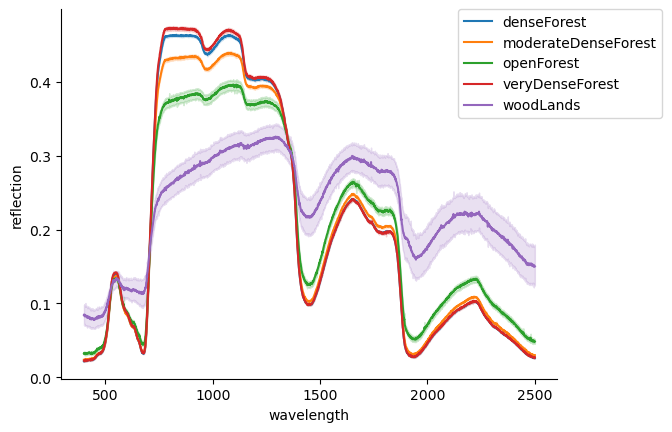

In [22]:
sns.lineplot(data = df_long, x = 'wavelength', y = 'reflection', hue = 'ForestType')
sns.despine()
plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0)

In [20]:
wavelength_columns = [col for col in df.drop(['wetness'], axis=1).columns if col.startswith('w')]
wavelength_numbers = [int(col[1:]) for col in wavelength_columns]
correlation = df[['lai'] + wavelength_columns].corr()['lai']
df_long['correlation'] = df_long['wavelength'].map(dict(zip(wavelength_numbers, correlation[1:])))


In [38]:
# Average or median Sentinel_2A values for each ForestType
sentinel_columns = ['Sentinel_2A_492.4', 'Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
                    'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8', 'Sentinel_2A_864.7',
                    'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4']
sentinel_avg = df.groupby('ForestType')[sentinel_columns].mean()

C:\Users\Jonas\AppData\Local\Temp\ipykernel_11940\2880468960.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  palette = lineplot.get_legend().legendHandles


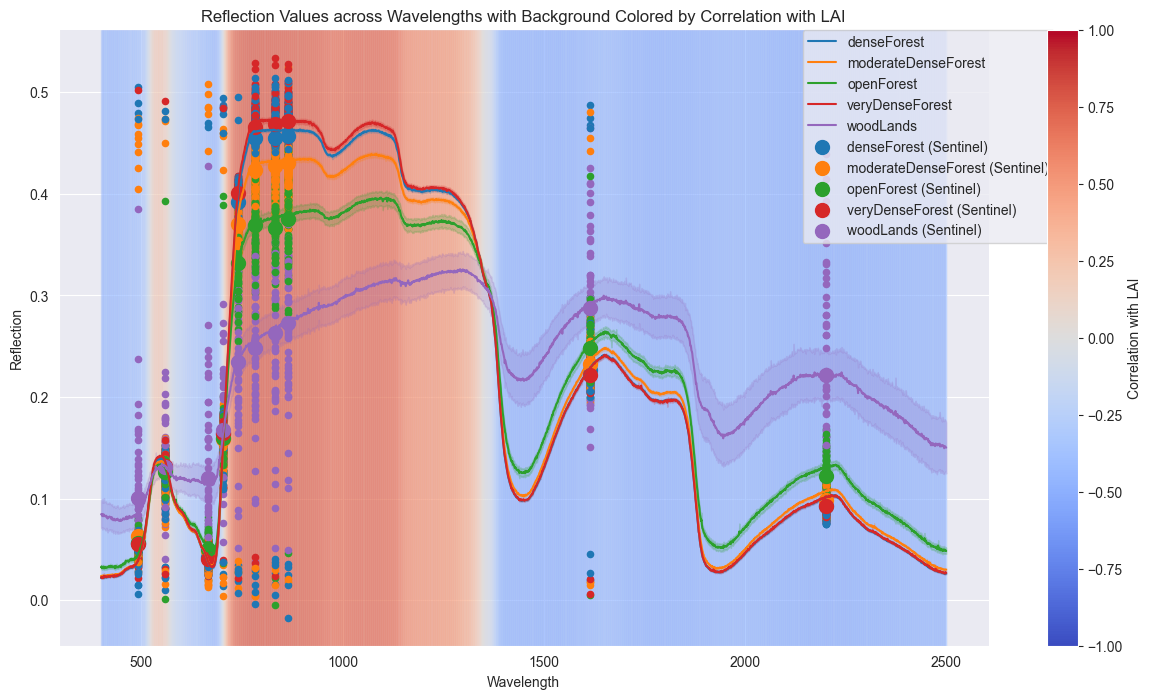

In [46]:
cmap = cmap = plt.cm.coolwarm #sns.color_palette("icefire", as_cmap=True)
norm = plt.Normalize(vmin=-1, vmax=1)

# Creating the plot with colored background for each wavelength
plt.figure(figsize=(15, 8))
# Color the background for each wavelength according to its correlation
for wv, corr in zip(wavelength_numbers, correlation[1:]):
    plt.axvspan(wv - 0.5, wv + 0.5, color=cmap(norm(corr)), alpha=0.2)

# Plotting the lineplot with 'ForestType' as the hue
lineplot = sns.lineplot(data=df_long, x='wavelength', y='reflection', hue='ForestType')
sns.despine()

# Extracting the color palette used in the lineplot
palette = lineplot.get_legend().legendHandles
forest_type_colors = {forest_type: color.get_color() for forest_type, color in zip(df['ForestType'].unique(), palette)}

# Overlay Sentinel_2A measurements as markers
for _, row in df.iterrows():
    forest_type = row['ForestType']
    for col in sentinel_columns:
        wavelength = float(col.split('_')[-1])
        plt.scatter(wavelength, row[col], color=forest_type_colors[forest_type], s=20)


# Overlay Sentinel_2A measurements as markers
for forest_type in sentinel_avg.index:
    for col, val in sentinel_avg.loc[forest_type].items():
        # Extracting wavelength number from column name (e.g., '492.4' from 'Sentinel_2A_492.4')
        wavelength = float(col.split('_')[-1])
        plt.scatter(wavelength, val, marker='o', color=forest_type_colors[forest_type], s=100, label=f'{forest_type} (Sentinel)')


# Adding a color bar for the correlation
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=plt.gca(), orientation='vertical', label='Correlation with LAI')

# Setting the plot titles and labels
plt.title("Reflection Values across Wavelengths with Background Colored by Correlation with LAI")
plt.xlabel("Wavelength")
plt.ylabel("Reflection")

# Adjust legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Removing duplicate labels
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0)


# Show the plot
plt.show()

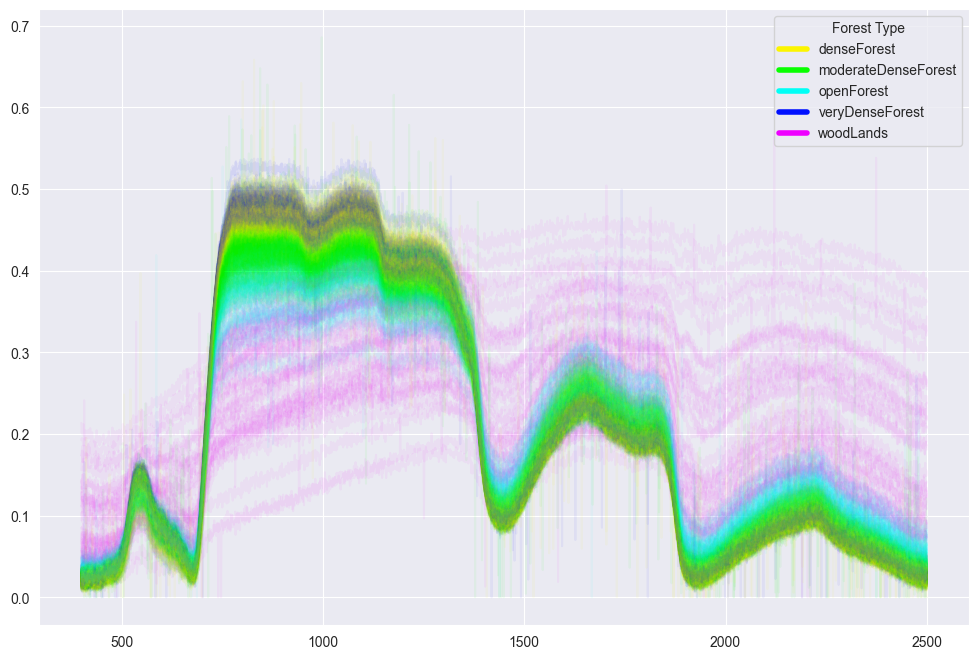

In [16]:
plt.figure(figsize=(12, 8))

# Create a color palette with a distinct color for each ForestType
palette = sns.color_palette('hsv', n_colors=len(df_long['ForestType'].unique()))

# Create a dictionary to map ForestType values to colors
color_map = {forest_type: color for forest_type, color in zip(df_long['ForestType'].unique(), palette)}

# Plotting
for idx, group in df_long.groupby(df_long.index):
    plt.plot(group['wavelength'], group['reflection'], color=color_map[group['ForestType'].iloc[0]], alpha=0.05)

# Create a custom legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()]
plt.legend(handles=legend_labels, labels=color_map.keys(), title="Forest Type")

plt.show()


C:\Users\Jonas\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


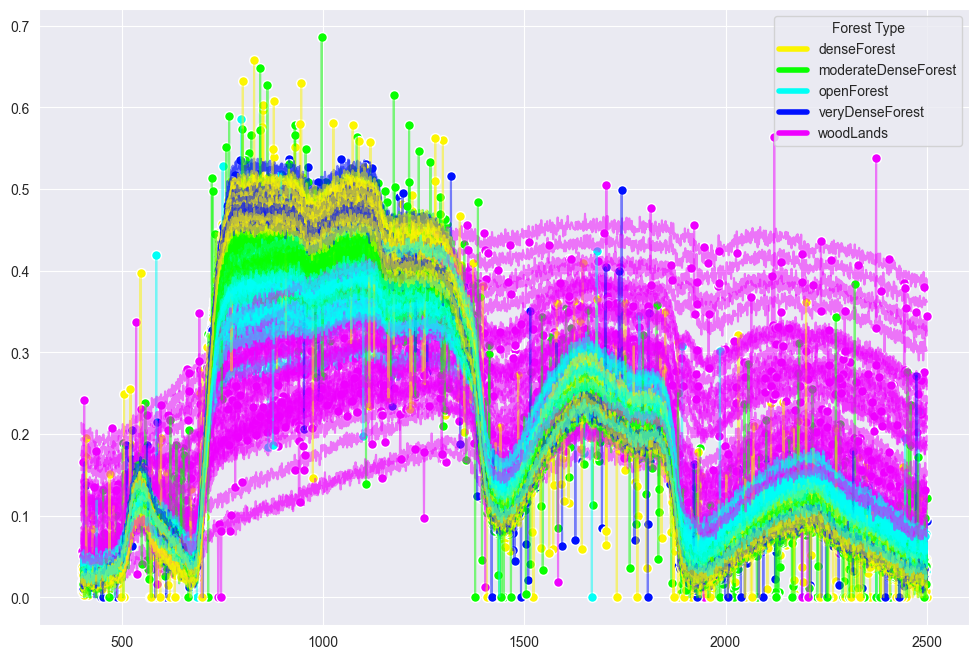

In [6]:
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create a color palette with a distinct color for each ForestType
palette = sns.color_palette('hsv', n_colors=len(df_long['ForestType'].unique()))

# Create a dictionary to map ForestType values to colors
color_map = {forest_type: color for forest_type, color in zip(df_long['ForestType'].unique(), palette)}

# Function to identify spikes
def find_spikes(series, width=3, threshold=3):
    # Calculate differences between consecutive points
    diff = np.abs(np.diff(series))
    # Identify spikes: points where the difference is above the threshold
    spikes = np.where(diff > (np.mean(diff) + np.std(diff) * threshold))[0]
    # We add 1 because np.diff reduces the original index by 1
    return spikes + 1

# Plotting with spikes highlighted
for idx, group in df_long.groupby(df_long.index):
    # Determine the spikes in the group
    spikes = find_spikes(group['reflection'])
    # Plot all points with some transparency
    plt.plot(group['wavelength'], group['reflection'],color=color_map[group['ForestType'].iloc[0]], alpha=0.5)
    # Highlight spikes with a different style
    plt.scatter(group['wavelength'].iloc[spikes], group['reflection'].iloc[spikes], color=color_map[group['ForestType'].iloc[0]], edgecolor='w', s=50)

# Create a custom legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()]
plt.legend(handles=legend_labels, labels=color_map.keys(), title="Forest Type")

plt.show()



#### Descriptive Statistics

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
columns_with_missing_values = df.columns[df.isnull().any()]
sns.heatmap(df[columns_with_missing_values].isnull(), cbar = False)
plt.show()

## Data Quality Summary
* The dataset contains 1000 rows.
* The column 'lai' is the target variable.
* The feature columns can be divided into three groups:
    * Numerical feature wetness
    * Categorical feature treeSpecies
    * 10 Numerical features of Sentinel-2A wavelengths
    * 2101 Numerical features of wavelengths
* 65 rows with at least one null value. Null values are only present in the columns 'Sentinel_2A_704.1', 'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'w469', 'w470', 'w471', 'w473', 'w474'